In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

import os

In [3]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed()

# Carregar base de dados

Dividir os dados em um conjunto de treino e testes

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape, x_train.dtype)
print(y_train.shape)

(50000, 32, 32, 3) float32
(50000, 1)


# Carregar o modelo

In [8]:
model = tf.keras.Sequential([
    hub.KerasLayer(
        "https://www.kaggle.com/models/google/inception-v1/frameworks/TensorFlow2/variations/classification/versions/2",
        trainable=False,
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.build(input_shape=(None, 32, 32, 3))

# Treinando o Modelo

In [9]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2907 - accuracy: 0.5384 - val_loss: 1.3038 - val_accuracy: 0.5349
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2803 - accuracy: 0.5469 - val_loss: 1.2910 - val_accuracy: 0.5362
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2726 - accuracy: 0.5461 - val_loss: 1.2964 - val_accuracy: 0.5370
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2648 - accuracy: 0.5497 - val_loss: 1.2885 - val_accuracy: 0.5391
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2589 - accuracy: 0.5522 - val_loss: 1.2752 - val_accuracy: 0.5421
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2531 - accuracy: 0.5542 - val_loss: 1.2842 - val_accuracy: 0.5431
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2499 - accuracy: 0.5549 - val_loss: 1.2835 -

# Visualização do Modelo

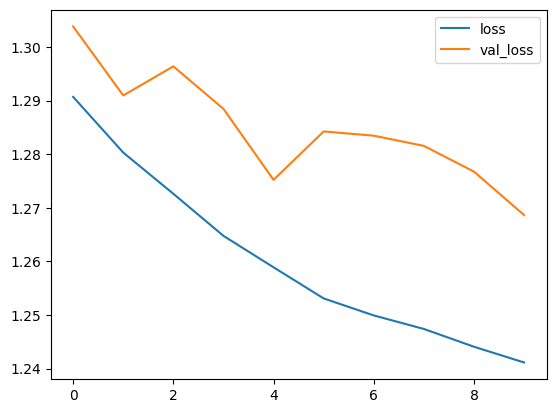

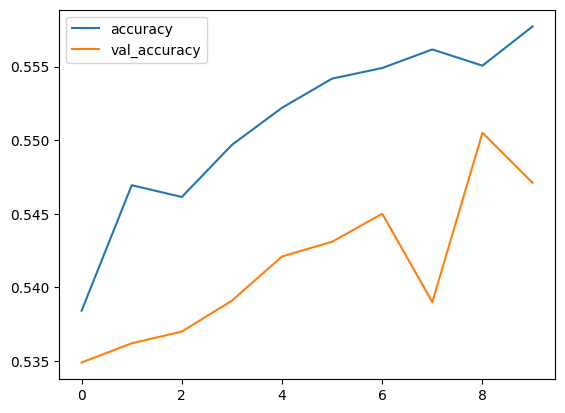

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();